<a href="https://colab.research.google.com/github/Alfikriangelo/MachineLearningTasks/blob/main/8thWeekTask%20(UTS)/UTS_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [136]:
#import library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

In [137]:
# membaca dataset
dataset = pd.read_csv('sample_data/RegresiUTSTelkom.csv')

In [138]:
# Menampilkan jumlah baris
print(f"Jumlah baris dalam dataset: {dataset.shape[0]}")

Jumlah baris dalam dataset: 999


# **Splitting Data**

In [139]:
# Misalkan kita ingin menggunakan kolom pertama sebagai variabel X dan kolom kedua sebagai variabel Y (untuk contoh regresi linier sederhana)
X = dataset.iloc[:, 0].values.reshape(-1, 1)  # Menjadikan kolom pertama sebagai fitur
y = dataset.iloc[:, 1].values  # Menjadikan kolom kedua sebagai target


# **Standarisasi Data**

In [140]:
# Normalisasi Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# **Polynomial Regression**

In [141]:
# Membuat model Polynomial Regression
poly_reg = PolynomialFeatures(degree=4)  # Menentukan derajat polinomial
X_poly = poly_reg.fit_transform(X_scaled)  # Mengubah fitur X menjadi fitur polinomial

In [142]:
# Membuat model regresi linier pada data yang sudah diubah menjadi polinomial
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)


LinearRegression()

Text(0, 0.5, 'y')

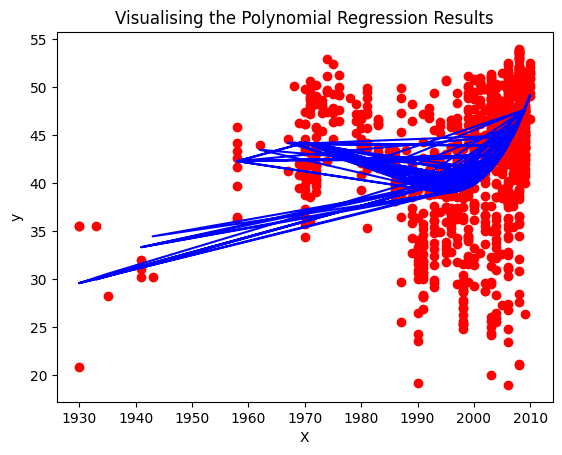

In [143]:
# Visualisasi Hasil Polynomial Regression
# Plot hasil regresi polinomial pada data asli
plt.scatter(X, y, color='red')  # Menampilkan data asli sebagai titik merah
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X_scaled)), color='blue')  # Menampilkan hasil prediksi Polynomial Regression

# Memberikan judul dan label untuk sumbu
plt.title('Visualising the Polynomial Regression Results')
plt.xlabel('X')
plt.ylabel('y')

kita menampilkan hasil dari regresi polinomial derajat 4 yang telah diterapkan pada data yang ada. Dalam grafik ini, titik-titik merah mewakili data asli, sedangkan garis biru menunjukkan prediksi yang dihasilkan oleh model regresi polinomial. Model ini mencoba untuk menangkap hubungan non-linear antara variabel independen dan dependen dengan cara mengubah data asli menjadi bentuk polinomial dan kemudian memodelkannya menggunakan regresi linier.

In [144]:
# Menampilkan grafik
plt.show()

In [145]:
# Untuk menghasilkan garis yang lebih halus, kita bisa membuat grid untuk X yang lebih rapat
X_grid = np.arange(min(X), max(X), 0.1)  # Membuat array yang lebih rapat untuk X
X_grid = X_grid.reshape((len(X_grid), 1))

<ipython-input-145-90afb33a095b>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)  # Membuat array yang lebih rapat untuk X


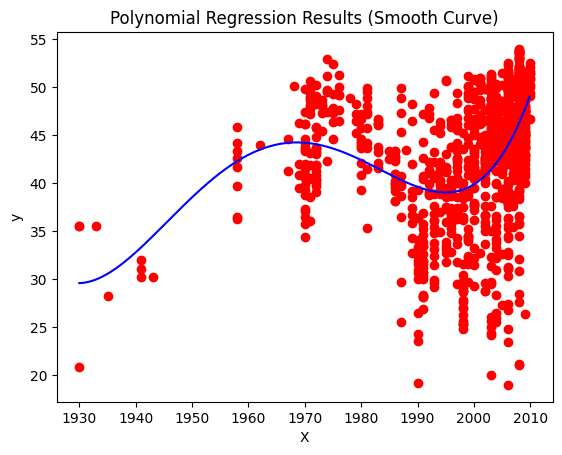

In [146]:
# Plot hasil regresi polinomial pada grid
plt.scatter(X, y, color='red')  # Menampilkan data asli sebagai titik merah
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(scaler.transform(X_grid))), color='blue')  # Hasil regresi dengan grid X yang lebih halus
plt.title('Polynomial Regression Results (Smooth Curve)')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

kita mencoba untuk membuat hasil visualisasi lebih halus dengan membuat grid yang lebih rapat pada nilai-nilai fitur X. Dengan menggunakan grid ini, kita dapat menggambar garis prediksi yang lebih lancar dan lebih halus, daripada garis yang dihasilkan oleh titik data yang lebih jarang. Grafik ini masih menampilkan titik merah sebagai data asli, tetapi garis biru menjadi lebih mulus dan terlihat lebih presisi dalam mengikuti pola data.

Hal ini penting karena model polinomial, dengan bantuan grid yang lebih rapat, dapat menunjukkan bagaimana hasil regresi polinomial bekerja lebih halus dalam menangkap pola yang ada pada data. Dengan kata lain, meskipun model ini bisa menangkap hubungan non-linear, penggunaan grid yang rapat memberikan kesan visual yang lebih terperinci dan lebih mudah dipahami, mengurangi ketidakteraturan yang muncul dalam grafik. Sehingga, visualisasi ini membantu kita lebih memahami bagaimana model polinomial memperlakukan data dan prediksinya, memberikan gambaran yang lebih jelas tentang bagaimana model bekerja untuk mengusulkan garis yang sesuai dengan pola data.

In [147]:
# Prediksi hasil untuk nilai X baru (misalnya X = 6)
X_new = np.array([[2011]])  # Misalkan kita ingin memprediksi hasil untuk X = 6

In [148]:
# Transformasi nilai X baru ke dalam bentuk polinomial yang sesuai dengan model
X_new_scaled = scaler.transform(X_new)  # Normalisasi X_new dengan scaler yang sama
X_new_poly = poly_reg.transform(X_new_scaled)  # Transformasi ke polinomial


In [149]:
# Prediksi hasilnya menggunakan model yang telah dilatih
y_pred = lin_reg_2.predict(X_new_poly)

# Menampilkan hasil prediksi
print(f'Prediksi untuk X = 2011: {y_pred[0]}')

Prediksi untuk X = 2011: 50.923297934256155


Prediksi untuk X = 2011: 50.923297934256155 pada model Polynomial Regression menunjukkan nilai target (y) yang diperkirakan oleh model ketika diberikan input X = 2011. Ini adalah hasil dari pemodelan yang telah dilakukan menggunakan regresi polinomial derajat 4.

# **Exploratory Data Analysis Polynomial Regression**

Setelah membangun model Polynomial Regression dengan derajat polinomial 4, kita memvisualisasikan hasil regresi menggunakan scatter plot dan garis biru yang menunjukkan prediksi model pada data asli. Visualisasi ini bertujuan untuk memperlihatkan bagaimana model ini menangkap hubungan non-linier antara fitur dan target. Titik merah pada plot mewakili data asli, sementara garis biru menunjukkan prediksi model polinomial.

Dalam visualisasi pertama, kita bisa melihat bahwa model polinomial dengan derajat yang cukup tinggi dapat menangkap pola non-linier dalam data. Garis biru mengikuti fluktuasi data dengan baik. Namun, untuk mendapatkan hasil yang lebih halus dan lebih presisi, kita dapat menggunakan grid yang lebih rapat dalam visualisasi kedua. Dengan menggunakan grid ini, kita dapat melihat bahwa kurva yang dihasilkan menjadi lebih halus dan lebih detail, yang membuat prediksi model lebih mulus.

Selanjutnya, untuk prediksi pada nilai input tertentu, misalnya X = 2011, model Polynomial Regression memprediksi nilai target sebesar 50.923. Prediksi ini menunjukkan bagaimana model polinomial menghasilkan estimasi berdasarkan hubungan non-linier antara fitur dan target. Prediksi ini dapat digunakan untuk meramalkan hasil berdasarkan input yang sebelumnya tidak ada dalam data pelatihan.

# **XGBoost**

In [150]:
# Menyiapkan model XGBoost
model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1, max_depth=5, alpha=10, n_estimators=100)

In [151]:
# Melatih model XGBoost
model.fit(X_scaled, y)


XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, ...)

In [152]:
# Visualising the XGBoost results
X_grid = np.arange(min(X_scaled), max(X_scaled), 0.1)  # Membuat grid untuk visualisasi
X_grid = X_grid.reshape((len(X_grid), 1))

<ipython-input-152-924ba34401e1>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X_scaled), max(X_scaled), 0.1)  # Membuat grid untuk visualisasi


In [153]:
# Prediksi menggunakan model XGBoost untuk data grid
y_pred_grid = model.predict(X_grid)

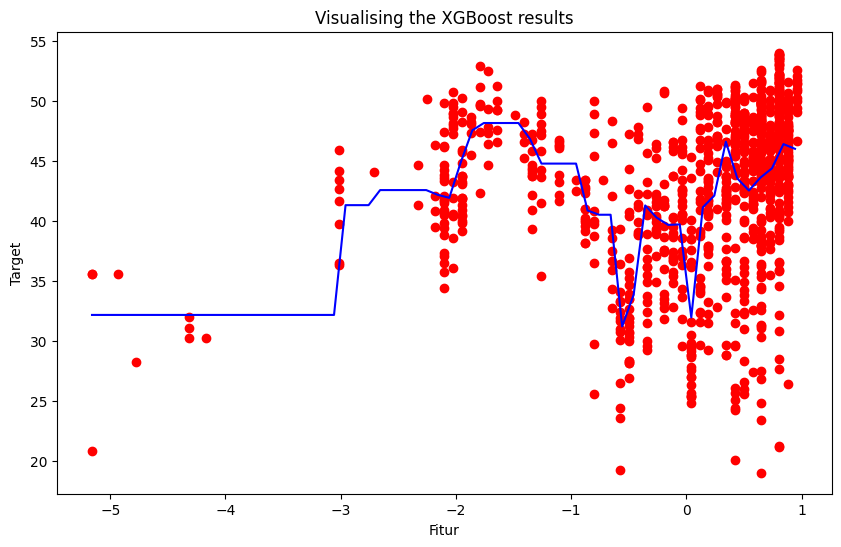

In [154]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled, y, color='red')  # Data pelatihan
plt.plot(X_grid, y_pred_grid, color='blue')  # Prediksi dari model XGBoost
plt.title('Visualising the XGBoost results')
plt.xlabel('Fitur')
plt.ylabel('Target')
plt.show()

kita melihat bagaimana model XGBoost menghasilkan prediksi dan bagaimana hasil tersebut divisualisasikan dalam grafik. XGBoost adalah algoritma machine learning yang menggunakan pendekatan boosting untuk meningkatkan akurasi prediksi. Boosting adalah teknik yang menggabungkan prediksi dari beberapa model lemah (weak models), dengan setiap model baru berfokus pada kesalahan yang dibuat oleh model sebelumnya, sehingga menghasilkan model yang lebih kuat dan akurat.

In [155]:
# Prediksi untuk nilai X baru
X_new = np.array([[2011]])  # Misalkan kita ingin memprediksi hasil untuk X = 6

In [156]:
# Normalisasi X_new dengan scaler yang sama
X_new_scaled = scaler.transform(X_new)

In [157]:
# Prediksi menggunakan model XGBoost
y_pred = model.predict(X_new_scaled)

# Menampilkan hasil prediksi
print(f'Prediksi untuk X = 2011: {y_pred[0]}')

Prediksi untuk X = 2011: 49.705055236816406


Prediksi untuk X = 2011: 49.705055236816406 pada model XGBoost menunjukkan nilai target (y) yang diperkirakan oleh model ketika diberikan input X = 2011. Ini adalah hasil prediksi yang dihasilkan setelah model XGBoost dilatih dengan data dan digunakan untuk memprediksi nilai target berdasarkan fitur yang diberikan.

# **Exploratory Data Analysis XGBoost**

Model XGBoost yang lebih kompleks dan fleksibel digunakan untuk menangkap pola yang lebih rumit dalam data. XGBoost mampu menangani interaksi antara fitur dengan cara yang lebih canggih dan dapat menghasilkan prediksi yang lebih akurat, terutama ketika data memiliki hubungan yang lebih kompleks.

Visualisasi dari XGBoost menunjukkan scatter plot yang menampilkan data asli (titik merah) dan garis biru yang mewakili hasil prediksi dari model XGBoost. Seperti yang kita lihat dalam plot ini, garis biru mengikuti pola data dengan lebih fleksibel, memperlihatkan bagaimana model ini dapat menangkap hubungan yang lebih kompleks dan menghasilkan prediksi yang lebih presisi. Dibandingkan dengan Polynomial Regression, XGBoost lebih unggul dalam menangani hubungan non-linier yang lebih rumit dan menghasilkan prediksi yang lebih sesuai dengan pola data.

Saat melakukan prediksi untuk input X = 2011, model XGBoost menghasilkan nilai prediksi 49.705, yang sedikit lebih rendah dibandingkan dengan prediksi Polynomial Regression yang menghasilkan 50.923. Perbedaan ini menunjukkan bahwa meskipun kedua model berhasil menangkap pola data, masing-masing model memiliki cara yang berbeda dalam memperkirakan nilai target berdasarkan input yang diberikan.

# **Kesimpulan**

Melalui Exploratory Data Analysis yang dilakukan dengan kedua model ini, kita dapat menarik beberapa kesimpulan. Pertama, Polynomial Regression cocok digunakan untuk data yang menunjukkan hubungan non-linier antara fitur dan target. Model ini dapat menangkap pola data dengan baik, terutama ketika hubungan antara X dan y tidak linear. Hasil visualisasi dari Polynomial Regression menunjukkan bahwa model ini bisa memberikan hasil yang sangat baik dengan menggunakan derajat polinomial yang tepat.

Namun, meskipun Polynomial Regression dapat memberikan prediksi yang baik, ia cenderung sensitif terhadap overfitting, terutama jika derajat polinomial terlalu tinggi. Dalam kasus ini, model bisa terlalu mengikuti fluktuasi kecil dalam data, yang mengarah pada prediksi yang kurang general.

Di sisi lain, XGBoost memberikan hasil yang lebih fleksibel dan lebih kuat dalam menangani data yang lebih kompleks. Dengan model ini, kita bisa menangkap interaksi antara fitur dan hubungan yang lebih rumit, yang seringkali ditemukan dalam data nyata. Hasil visualisasi dari XGBoost menunjukkan bahwa model ini lebih unggul dalam menangani pola data yang lebih rumit dan dapat menghasilkan prediksi yang lebih akurat pada data yang lebih kompleks.

Kedua model ini, meskipun masing-masing memiliki kelebihan, menunjukkan bahwa pilihan model yang tepat sangat bergantung pada sifat data. Jika data menunjukkan pola linier yang jelas, Polynomial Regression bisa jadi pilihan yang baik. Namun, jika data mengandung hubungan yang lebih rumit dan melibatkan interaksi antar fitur, maka XGBoost akan lebih efektif dalam memberikan hasil prediksi yang lebih akurat.